In [1]:
import pandas as pd

In [2]:
#reading Amazon order data
df=pd.read_csv('amazon-orders.csv')
#Shape of the dataframe
df.shape
#First 5 columns and values
df.head()

,Order Date,Order ID,Title,Category,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Order Status,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Group Name
0,7/1/2021,114-3890855-1762658,Linenspa 8 Inch Memory Foam and Innerspring Hy...,HOME_FURNITURE_AND_DECOR,Amazon.com,NaN,new,Amazon.com,NaN,$244.99,$189.21,1,Shipped,$189.21,$17.03,$206.24,False,NaN,False,NaN
1,12/1/2021,114-2109640-4754643,"Mofason Stove Counter Gap Cover, Kitchen Silic...",POT_HOLDER,Amazon.com,NaN,new,Mofason,NaN,$0.00,$18.99,1,Shipped,$18.99,$1.71,$20.70,False,NaN,False,NaN
2,12/1/2021,114-2109640-4754643,"Amazon Basics Slim, Velvet, Non-Slip Clothes S...",CLOTHES_HANGER,Amazon.com,NaN,new,Amazon.com,NaN,$0.00,$24.22,1,Shipped,$24.22,$2.18,$26.40,False,NaN,False,NaN
3,01/13/21,114-3306397-3109063,Abakan Bed Sheet Set Queen Size Super Soft 4 P...,BED_LINEN_SET,Amazon.com,NaN,new,Abakan,NaN,$51.90,$23.99,1,Shipped,$23.99,$2.16,$26.15,False,NaN,False,NaN
4,01/15/21,114-0392421-1716206,"Dish Drying Rack, 2 Pack Roll up Drying Rack, ...",DRYING_RACK,Amazon.com,NaN,new,Jijie E-commerce,NaN,$39.99,$22.99,1,Shipped,$22.99,$2.07,$25.06,False,NaN,False,NaN


In [3]:
#Data Cleaning
df.columns
df=df[['Order Date','Order ID','Category','List Price Per Unit','Purchase Price Per Unit','Quantity','Item Subtotal','Item Subtotal Tax','Item Total']]
df.shape
df.head()

,Order Date,Order ID,Category,List Price Per Unit,Purchase Price Per Unit,Quantity,Item Subtotal,Item Subtotal Tax,Item Total
0,7/1/2021,114-3890855-1762658,HOME_FURNITURE_AND_DECOR,$244.99,$189.21,1,$189.21,$17.03,$206.24
1,12/1/2021,114-2109640-4754643,POT_HOLDER,$0.00,$18.99,1,$18.99,$1.71,$20.70
2,12/1/2021,114-2109640-4754643,CLOTHES_HANGER,$0.00,$24.22,1,$24.22,$2.18,$26.40
3,01/13/21,114-3306397-3109063,BED_LINEN_SET,$51.90,$23.99,1,$23.99,$2.16,$26.15
4,01/15/21,114-0392421-1716206,DRYING_RACK,$39.99,$22.99,1,$22.99,$2.07,$25.06


Replacing the $ sign in the price

In [4]:
df=df.replace(regex='\$(.*)',value=r'\1')

In [5]:
df.head()

,Order Date,Order ID,Category,List Price Per Unit,Purchase Price Per Unit,Quantity,Item Subtotal,Item Subtotal Tax,Item Total
0,7/1/2021,114-3890855-1762658,HOME_FURNITURE_AND_DECOR,244.99,189.21,1,189.21,17.03,206.24
1,12/1/2021,114-2109640-4754643,POT_HOLDER,0.00,18.99,1,18.99,1.71,20.70
2,12/1/2021,114-2109640-4754643,CLOTHES_HANGER,0.00,24.22,1,24.22,2.18,26.40
3,01/13/21,114-3306397-3109063,BED_LINEN_SET,51.90,23.99,1,23.99,2.16,26.15
4,01/15/21,114-0392421-1716206,DRYING_RACK,39.99,22.99,1,22.99,2.07,25.06


 Calculating the Total Amount of Money spent in Amazon

In [6]:
df.dtypes

Order Date                 object
Order ID                   object
Category                   object
List Price Per Unit        object
Purchase Price Per Unit    object
Quantity                    int64
Item Subtotal              object
Item Subtotal Tax          object
Item Total                 object
dtype: object

In [7]:
#Changing Data Type of Price columns
cols=['List Price Per Unit','Purchase Price Per Unit','Item Subtotal','Item Subtotal Tax','Item Total']
df[cols]=df[cols].apply(pd.to_numeric,errors='coerce')

In [8]:
df['Item Total'].sum()

2114.26

Average Purchase Price Spend on Amazon

In [9]:
df['Item Total'].mean()

45.96217391304347

In [10]:
df['Item Total'].median()

23.905

Median is far lower than the the mean ie few items bought were more expensive than the latter

The Most Expensive thing bought from Amazon

In [11]:
df.loc[df['Item Total']==df['Item Total'].max()]

,Order Date,Order ID,Category,List Price Per Unit,Purchase Price Per Unit,Quantity,Item Subtotal,Item Subtotal Tax,Item Total
37,1/4/2021,114-8339633-3692265,TREADMILL,0.0,499.0,1,499.0,44.91,543.91


Money Spent on Sales Tax

In [12]:
df['Item Subtotal Tax'].sum()

173.01999999999998

Overall Tax Rate for Each Items

In [13]:
(df['Item Subtotal Tax'].sum()/df['Item Total'].sum())*100

8.183477907163734

Analyzing Amazon Spending Over Time

In [14]:
#Converting OrderDate to Datatime Datatype
df['Order Date']=pd.to_datetime(df['Order Date'])
df.dtypes

Order Date                 datetime64[ns]
Order ID                           object
Category                           object
List Price Per Unit               float64
Purchase Price Per Unit           float64
Quantity                            int64
Item Subtotal                     float64
Item Subtotal Tax                 float64
Item Total                        float64
dtype: object

In [15]:
df.head()

,Order Date,Order ID,Category,List Price Per Unit,Purchase Price Per Unit,Quantity,Item Subtotal,Item Subtotal Tax,Item Total
0,2021-07-01,114-3890855-1762658,HOME_FURNITURE_AND_DECOR,244.99,189.21,1,189.21,17.03,206.24
1,2021-12-01,114-2109640-4754643,POT_HOLDER,0.00,18.99,1,18.99,1.71,20.70
2,2021-12-01,114-2109640-4754643,CLOTHES_HANGER,0.00,24.22,1,24.22,2.18,26.40
3,2021-01-13,114-3306397-3109063,BED_LINEN_SET,51.90,23.99,1,23.99,2.16,26.15
4,2021-01-15,114-0392421-1716206,DRYING_RACK,39.99,22.99,1,22.99,2.07,25.06


<AxesSubplot:xlabel='Order Date'>

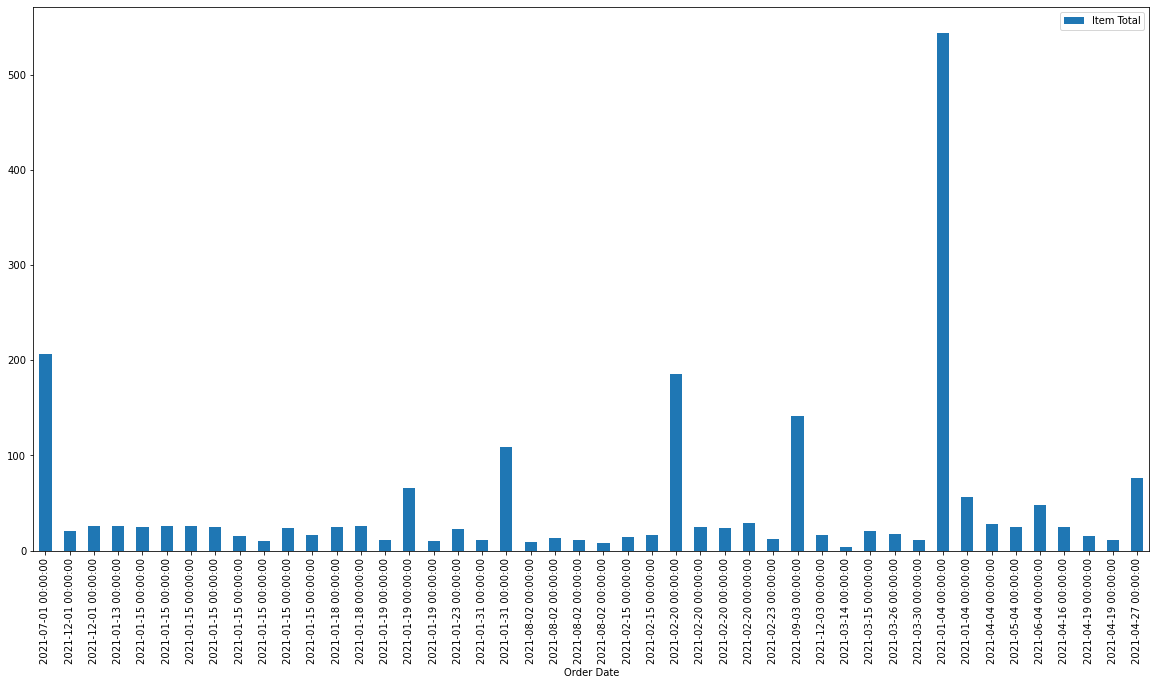

In [16]:
%matplotlib inline
df.plot.bar(x='Order Date',y='Item Total',figsize=(20,10),rot=90)

In [17]:
daily_orders=df.groupby('Order Date').sum()['Item Total']
daily_orders.head()

Order Date
2021-01-04    599.83
2021-01-13     26.15
2021-01-15    167.67
2021-01-18     50.66
2021-01-19     86.62
Name: Item Total, dtype: float64

<AxesSubplot:xlabel='Order Date'>

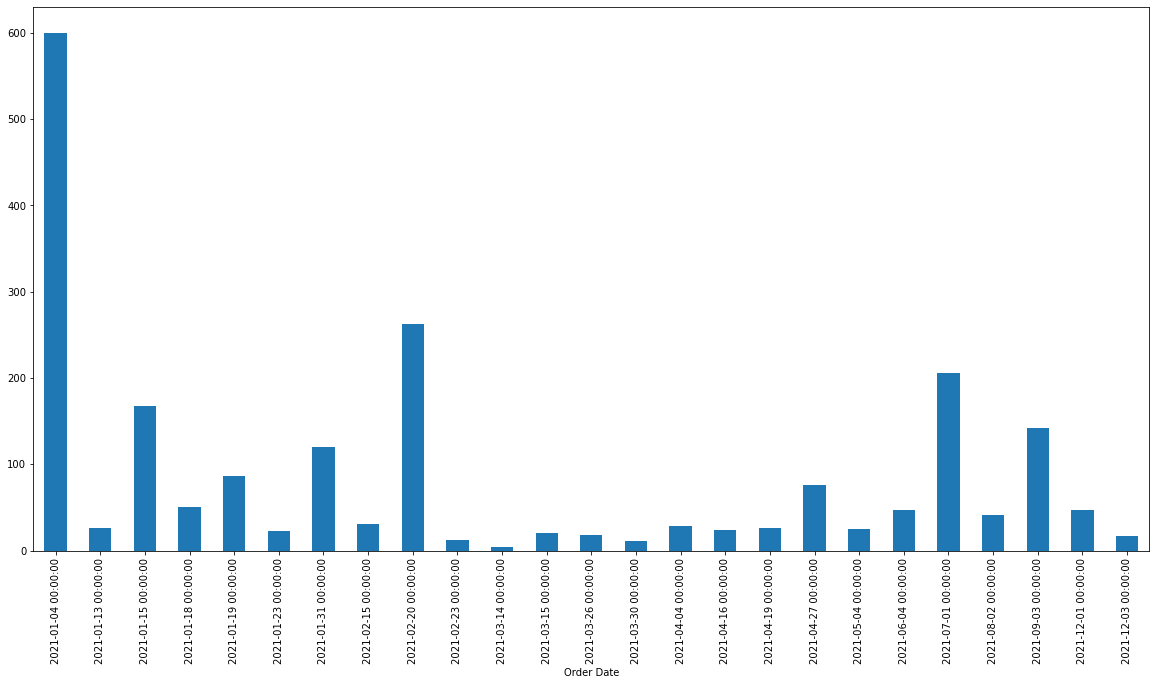

In [18]:
daily_orders.plot.bar(figsize=(20,10))

Monthly Spending Trend

In [19]:
df.groupby(df['Order Date'].dt.strftime('%B'))['Item Total'].sum().sort_values()

Order Date
May            25.06
August         40.84
June           47.48
March          54.05
December       63.70
September     141.69
April         155.50
July          206.24
February      306.21
January      1073.49
Name: Item Total, dtype: float64

See the Items bought in April

In [20]:
df.loc[df['Order Date'].dt.month==1]

,Order Date,Order ID,Category,List Price Per Unit,Purchase Price Per Unit,Quantity,Item Subtotal,Item Subtotal Tax,Item Total
3,2021-01-13,114-3306397-3109063,BED_LINEN_SET,51.90,23.99,1,23.99,2.16,26.15
4,2021-01-15,114-0392421-1716206,DRYING_RACK,39.99,22.99,1,22.99,2.07,25.06
5,2021-01-15,114-0392421-1716206,KITCHEN,0.00,23.99,1,23.99,2.05,26.04
6,2021-01-15,114-0392421-1716206,ARTIFICIAL_PLANT,0.00,23.99,1,23.99,2.16,26.15
7,2021-01-15,114-0392421-1716206,JAR,0.00,22.99,1,22.99,2.07,25.06
8,2021-01-15,114-0392421-1716206,KITCHEN,15.99,13.99,1,13.99,1.26,15.25
9,2021-01-15,114-0392421-1716206,HOSE_PIPE_FITTING,10.99,8.99,1,8.99,0.81,9.80
10,2021-01-15,114-0392421-1716206,KITCHEN,0.00,21.99,1,21.99,1.98,23.97
11,2021-01-15,114-0392421-1716206,TOOTHBRUSH_HOLDER,14.99,14.99,1,14.99,1.35,16.34
12,2021-01-18,114-0217131-7482656,VITAMIN,30.00,22.49,1,22.49,2.02,24.51
